# **Task 4: Predicting Car price Using the diffrent different feature**


# Import Libraries 

In [823]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset 

In [824]:
df = pd.read_csv(r'D:\Six Month Data Science Course with Codenamics\car dataset\car_dataset.csv')
df.head()

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota Fielder 2011,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota Noah 2005,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000
2,Toyota LiteAce 2001,Toyota,LiteAce,2001,Manual,NaN,CNG,1800,102000,165000
3,Maruti Suzuki Vitara Brezza 1994,Maruti Suzuki,Vitara Brezza,1994,Manual,NaN,CNG,1600,113000,230000
4,Toyota Starlet good 1992,Toyota,Starlet,1992,Automatic,Saloon,CNG,1300,15000,330000


# Data preprocessing 

In [825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   car_name         1209 non-null   object
 1   brand            1209 non-null   object
 2   car_model        1209 non-null   object
 3   model_year       1209 non-null   int64 
 4   transmission     1209 non-null   object
 5   body_type        1191 non-null   object
 6   fuel_type        1209 non-null   object
 7   engine_capacity  1209 non-null   int64 
 8   kilometers_run   1209 non-null   int64 
 9   price            1209 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 94.6+ KB


In [826]:
df.isnull().sum(
    
)

car_name            0
brand               0
car_model           0
model_year          0
transmission        0
body_type          18
fuel_type           0
engine_capacity     0
kilometers_run      0
price               0
dtype: int64

In [827]:
df.dropna(inplace=True)

In [828]:
df.isnull().sum()

car_name           0
brand              0
car_model          0
model_year         0
transmission       0
body_type          0
fuel_type          0
engine_capacity    0
kilometers_run     0
price              0
dtype: int64

In [829]:
df.duplicated().sum()

np.int64(1)

In [830]:
df.drop_duplicates(inplace=True)

In [831]:
df.duplicated().sum()

np.int64(0)

In [832]:
df.head(2)

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,Toyota Fielder 2011,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852,1200000
1,Toyota Noah 2005,Toyota,Noah,2010,Automatic,Hatchback,CNG,1998,219630,1200000


# Categorical Column Converted into Numerical by using LabelEncoder

# import labelEncoder

In [833]:
# in car name we will use labelled encoding not hot endcoding because there are so many names of cars
# import library
from sklearn.preprocessing import LabelEncoder

# Car_Name

In [834]:
Car_name = LabelEncoder()
df['car_name']=Car_name.fit_transform(df['car_name'])

# Fuel_Type

In [835]:
df['fuel_type'].unique()

array(['CNG', 'CNG, Hybrid', 'CNG, Octane', 'Diesel', 'Diesel, Petrol',
       'Hybrid', 'Hybrid, Octane', 'Hybrid, Octane, LPG', 'LPG', 'Octane',
       'Octane, LPG', 'Octane, Other fuel type', 'Petrol', 'Petrol, CNG',
       'Petrol, CNG, Octane', 'Petrol, CNG, Octane, LPG',
       'Petrol, Hybrid', 'Petrol, Hybrid, Octane',
       'Petrol, Hybrid, Octane, LPG', 'Petrol, LPG', 'Petrol, Octane',
       'Petrol, Octane, LPG', 'Petrol, Octane, Other fuel type',
       'Petrol, Other fuel type'], dtype=object)

In [836]:
# label LabelEncoding is best for this but we can use one hot encoding
Fuel_type = LabelEncoder()
df['fuel_type']=Fuel_type.fit_transform(df['fuel_type'])

# Brand

In [837]:
Brand = LabelEncoder()
df['brand']=Brand.fit_transform(df['brand'])

# car_model	

In [838]:
Car_Model = LabelEncoder()
df['car_model']=Car_Model.fit_transform(df['car_model'])

# Transmission

In [839]:
Transmission = LabelEncoder()
df['transmission']=Transmission.fit_transform(df['transmission'])

# Body_Type

In [840]:
Body_type = LabelEncoder()
df['body_type']=Body_type.fit_transform(df['body_type'])

In [841]:
# all data converted into numbers
df.head(2)

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run,price
0,583,23,40,2016,0,2,0,1500,45852,1200000
1,746,23,67,2010,0,3,0,1998,219630,1200000


# Seperate Input and Output data 

In [842]:
x=df.iloc[:,0:9]
y=df.iloc[:,-1]

In [843]:
x.head(2)

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run
0,583,23,40,2016,0,2,0,1500,45852
1,746,23,67,2010,0,3,0,1998,219630


In [844]:
y.head(2)

0    1200000
1    1200000
Name: price, dtype: int64

# now scaling of only input data in supervised machine learning but in unsupervised machine learning we scale both input and output data

In [845]:
# import for scaling 
from sklearn.preprocessing import StandardScaler

In [846]:
ss=StandardScaler()
ss.fit_transform(x) # fit only on input data which represent by x

array([[ 1.09364748e-01,  4.11679360e-01, -3.45558235e-01, ...,
        -1.31767706e+00, -4.63252658e-01, -3.52091741e-01],
       [ 6.31915741e-01,  4.11679360e-01,  4.79743638e-01, ...,
        -1.31767706e+00,  8.39820663e-01,  2.53969359e+00],
       [ 1.60007771e+00,  4.11679360e-01,  1.39674572e+00, ...,
        -1.31767706e+00, -9.86575278e-01, -8.65490221e-01],
       ...,
       [-7.59416352e-01,  4.11679360e-01, -1.41539400e+00, ...,
         2.29682267e+00,  1.79226783e+00,  2.32441302e+00],
       [-1.09602896e+00, -1.21439339e-03,  1.51901266e+00, ...,
         2.46111812e+00, -1.24823659e+00, -1.74489491e-04],
       [-1.09282312e+00, -1.21439339e-03,  1.51901266e+00, ...,
         2.46111812e+00, -1.24823659e+00,  1.03154811e+00]],
      shape=(1190, 9))

In [847]:
# now data is scaled and convert it into dataframe
input_data_x=pd.DataFrame(ss.fit_transform(x),columns=x.columns) # scaling data using StandardScaler and convert into dataframe then columns name assigned 


In [848]:
# Now check the input data 
input_data_x.head(2)

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run
0,0.109365,0.411679,-0.345558,0.919769,-0.213762,-2.335383,-1.317677,-0.463253,-0.352092
1,0.631916,0.411679,0.479744,0.043214,-0.213762,-1.557576,-1.317677,0.839821,2.539694


# Now data train and test so we split it into two parts 

1. agar meri company training and testing data alaug alaug deti ha to ham usy ko use karaingay otherwise ham ak hi dataset ma say spilt karainagay 20 % data ko testing data ma aur 80% data ko training data ma rakhaingay

In [849]:
# import library for testing and training
from sklearn.model_selection import train_test_split

In [850]:
# now split the data into train and test 
train_x ,test_x ,train_y ,test_y =train_test_split(input_data_x,y,test_size=0.2,random_state=0)

# Now kon kon say model ham bna sukatay hain us pa kam karainagay 

In [851]:
# These are supervise machine learning model
# we will use linear regression model,lasso,Ridge and ElasticNet model
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

# Another model 
from sklearn.tree import DecisionTreeRegressor

# another model like SVM
from sklearn.svm import SVR

# another model like KNN
from sklearn.neighbors import KNeighborsRegressor

# another model like random forest
from sklearn.ensemble import RandomForestRegressor

# But we can not predict the which type of regression used for this i will check this linearnity by using heatmap correlation function 

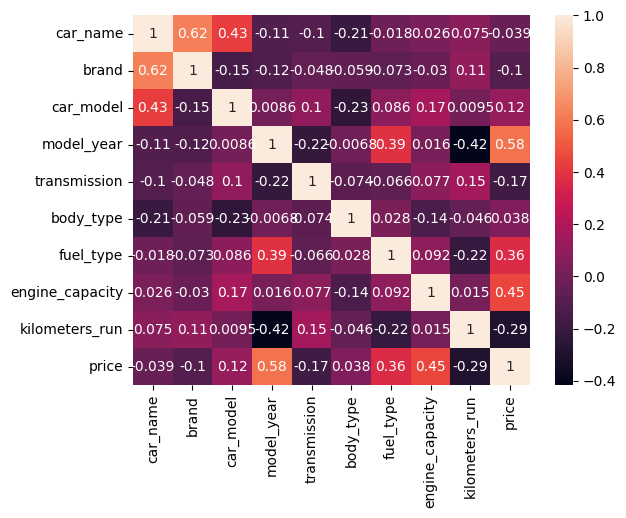

In [852]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

# Through the above heatmap we predict that no strong correlation exists between the two variables. We can also see that the correlation is not very strong.if my values neraest to 1 or -1 so it is a strong correlation.

In [ ]:
# one by one model implement 
# model 1 LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)


LinearRegression()

In [854]:
# check the accuracy of model
lr.score(test_x,test_y)*100, lr.score(train_x,train_y)*100

(56.039470328387786, 55.97965007731314)

In [855]:
# for model 2 Lasso
lr1=Lasso(alpha=0.05)
lr1.fit(train_x,train_y)
lr1.score(test_x,test_y)*100, lr1.score(train_x,train_y)*100

(56.03947160448508, 55.97965007731036)

In [856]:
# next model Ridge
lr2=Ridge(alpha=5)
lr2.fit(train_x,train_y)
lr2.score(test_x,test_y)*100, lr2.score(train_x,train_y)*100

(55.8897218122216, 55.97837029555015)

In [857]:
lr3=ElasticNet(alpha=0.1)
lr3.fit(train_x,train_y)
lr3.score(test_x,test_y)*100, lr3.score(train_x,train_y)*100

(54.62927588086406, 55.878133745952255)

In [858]:
# now check on decision tree model
dt=DecisionTreeRegressor(max_depth=10)
dt.fit(train_x,train_y)
dt.score(test_x,test_y)*100, dt.score(train_x,train_y)*100

(34.78586958188772, 98.74856476583793)

Decision tree gives more accurate answer rather than Linear Regression 

In [859]:
# now try raindomforest model
rf=RandomForestRegressor(n_estimators=5)
rf.fit(train_x,train_y)
rf.score(test_x,test_y)*100, rf.score(train_x,train_y)*100

(63.02986979038388, 95.12956159402842)

Rindomforest is also best 

In [860]:
# Neighbour model
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
KNN.score(test_x,test_y)*100, KNN.score(train_x,train_y)*100

(29.443168350476146, 90.57682032520502)

In [861]:
# SVR model
svr=SVR()
svr.fit(train_x,train_y)
svr.score(test_x,test_y)*100, svr.score(train_x,train_y)*100

(-8.143245988554382, -6.2421266901456995)

SVR model is very very low accurate 

# Check errors

In [862]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [863]:
# check decision tree errors 
mean_squared_error(test_y,dt.predict(test_x)),mean_absolute_error(test_y,dt.predict(test_x))

(np.float64(2196389622474.4624), np.float64(427557.86853741045))

In [864]:
# Check raindonforest errors
mean_squared_error(test_y,rf.predict(test_x)),mean_absolute_error(test_y,rf.predict(test_x))

(np.float64(1245141349172.6653), np.float64(374082.2212885154))

# Raindom forest errors is less than decision tree error so we select this type of model 

In [865]:
# Check snm error
mean_squared_error(test_y,svr.predict(test_x)),mean_absolute_error(test_y,svr.predict(test_x))

(np.float64(3642227561835.2007), np.float64(1072292.4823798304))

In [866]:
# Check KNN error
mean_squared_error(test_y,KNN.predict(test_x)),mean_absolute_error(test_y,KNN.predict(test_x))

(np.float64(2376329973828.0513), np.float64(501237.3802521008))

# Prediction model to ham raindom forest ko select karaingay 

In [867]:
test_x

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run
825,-1.365319,-1.033449,0.602011,0.043214,-0.213762,-0.001961,0.160982,0.845054,-0.008495
443,-0.477303,0.411679,-1.170860,0.773677,-0.213762,-2.335383,-0.496200,-0.463253,-0.033456
506,0.227981,0.411679,-0.345558,0.919769,-0.213762,-1.557576,-0.331904,-0.463253,-0.539998
1152,-1.464700,-2.065683,-0.039891,-1.563804,-0.213762,-0.001961,1.968232,0.845054,0.199514
364,1.212172,0.411679,0.754844,0.335399,-0.213762,0.775847,-0.989086,-0.463253,-0.161589
...,...,...,...,...,...,...,...,...,...
478,-0.611948,0.411679,-1.170860,0.919769,-0.213762,0.775847,-0.496200,-0.463253,-0.502723
961,0.407507,0.411679,-0.009324,0.773677,-0.213762,-0.779768,0.982459,0.845054,-0.410467
660,0.615887,0.411679,0.388043,-1.855990,-0.213762,0.775847,0.160982,-0.463253,-0.199863
854,-1.406995,-1.239896,-0.253858,0.919769,-0.213762,-0.001961,0.160982,-0.201591,-0.948694


In [868]:
rf.predict([[-1.365319,-1.033449,0.602011,0.043214,-0.213762,-0.001961,0.160982,0.845054,-0.008495]])

C:\Users\Abdul-Samad\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1506000.])

In [869]:
test_y

838     2250000
454     1590000
518     1620000
1171     980000
368     2050000
         ...   
489     1975000
978     2200000
673      850000
867     5250000
1104    2500000
Name: price, Length: 238, dtype: int64

In [870]:
new_dataset=pd.DataFrame([["Toyota Fielder 2011","Toyota","Fielder",2016,"Automatic","Estate","CNG",1500,45852]],columns=train_x.columns)

In [871]:
new_dataset

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run
0,Toyota Fielder 2011,Toyota,Fielder,2016,Automatic,Estate,CNG,1500,45852


In [872]:
new_dataset['car_name']=Car_name.transform(new_dataset['car_name'])

In [873]:
new_dataset['brand']=Brand.transform(new_dataset['brand'])

In [874]:
new_dataset['fuel_type']=Fuel_type.transform(new_dataset['fuel_type'])

In [875]:
new_dataset['transmission']=Transmission.transform(new_dataset['transmission'])

In [876]:
new_dataset['body_type']=Body_type.transform(new_dataset['body_type'])

In [877]:
new_dataset['car_model']=Car_Model.transform(new_dataset['car_model'])

scaling 

In [878]:
new_dataset=pd.DataFrame(ss.transform(new_dataset),columns=new_dataset.columns)

In [879]:
new_dataset

,car_name,brand,car_model,model_year,transmission,body_type,fuel_type,engine_capacity,kilometers_run
0,0.109365,0.411679,-0.345558,0.919769,-0.213762,-2.335383,-1.317677,-0.463253,-0.352092


In [880]:
rf.predict(new_dataset)

array([1238000.])